In [1]:
# To add a new cell, type '# %%'
# To add a new markdown cell, type '# %% [markdown]'
# %%
# duffing oscillator

import pandas as pd
import matplotlib.tri as tri
import matplotlib.pyplot as plt
import gudhi
import matplotlib
import numpy as np
from numpy import zeros, linspace, pi, cos, array
from matplotlib import pyplot as plt

t0 = 0
tf = 30*pi
omega = 1.2
beta = 1
delta = 0.3
gamma = 0.35
alpha = 1
n = 10000  # iteration

sampsize = 100  # SampleSize
sampstart = 5000  # SampleStart
sampend = n  # SampleEnd

h = (tf-t0)/(n-1)  # stepsize
print('the value of h is', h)
u0 = 0  # initial displacement


t = linspace(t0, tf, n)
v = zeros([n])
u = zeros([n])
u[0] = u0
v[0] = 0  # initial velocity

# DEFINING FUNCTIONS


def dudt(t, u, v):  # u' = v
    return(v)


def funt(t, u, v):  # v' = -delta*v+alpha*u-beta*u**3+gamma*cos(omega*t)
    return (-delta*v+alpha*u-beta*u**3+gamma*cos(omega*t))

# RK4 ALGORITHM USING FOR LOOP


for i in range(1, n):
    k1 = h*dudt(t[i-1], u[i-1], v[i-1])
    l1 = h*funt(t[i-1], u[i-1], v[i-1])

    k2 = h*dudt(t[i-1]+(0.5*h), u[i-1]+(k1*0.5), v[i-1]+(l1*0.5))
    l2 = h*funt(t[i-1]+(0.5*h), u[i-1]+(k1*0.5), v[i-1]+(l1*0.5))

    k3 = h*dudt(t[i-1]+(0.5*h), u[i-1]+(k2*0.5), v[i-1]+(l2*0.5))
    l3 = h*funt(t[i-1]+(0.5*h), u[i-1]+(k2*0.5), v[i-1]+(l2*0.5))

    k4 = h*dudt(t[i-1]+h, u[i-1]+(k3), v[i-1]+(l3))
    l4 = h*funt(t[i-1]+h, u[i-1]+(k3), v[i-1]+(l3))

    u[i] = u[i-1]+(1/6)*(k1+(2*k2)+(2*k3)+k4)
    v[i] = v[i-1]+(1/6)*(l1+(2*l2)+(2*l3)+l4)


def xx(a): return np.interp(a, (a.min(), a.max()), (0, +1))


uu = xx(u[sampstart:sampend:int(sampsize/2)])
vv = xx(v[sampstart:sampend:int(sampsize/2)])
huh = np.array(list(zip(uu, vv)))

huh = huh[np.random.choice(huh.shape[0], sampsize, replace=False), :]
u1, v1 = zip(*huh)

the value of h is 0.009425720532822661


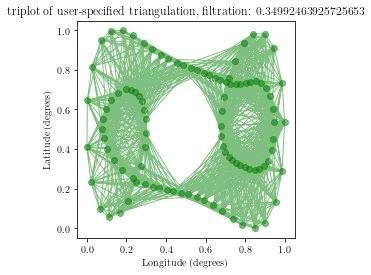

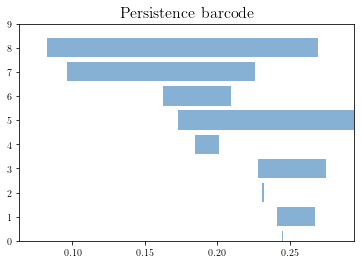

In [8]:
def genDiagWithFilt(points, length):
    rc = gudhi.RipsComplex(points=points, max_edge_length=length)
    st = rc.create_simplex_tree(max_dimension=2)

    BarCodes_RipsAll = st.persistence()
    BarCodes_Rips1 = list(
        filter(lambda BettiNum: BettiNum[0] == 1, BarCodes_RipsAll))
    max_filtration_value = np.array(list(st.get_filtration()))[-1, 1]

    # We are only going to plot the triangles
    triangles = np.array([s[0] for s in st.get_skeleton(2) if len(s[0]) == 3])
    return max_filtration_value, triangles, BarCodes_Rips1

max_filtration_value, triangles, BarCodes_Rips1 = genDiagWithFilt(huh, length=0.35)

fig2, ax2 = plt.subplots()
ax2.set_aspect('equal')
ax2.triplot(u1, v1, triangles, 'go-', lw=1.0,
            alpha=0.5)
ax2.set_title('triplot of user-specified triangulation, filtration: {}'.format(max_filtration_value))
ax2.set_xlabel('Longitude (degrees)')
ax2.set_ylabel('Latitude (degrees)')

plt.show()
gudhi.plot_persistence_barcode(BarCodes_Rips1)
